In [96]:
import pandas as pd
import numpy as np
# import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('/home/godslayer/Desktop/Smart_Internz_Assignment/Practice/Data_set/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
# null values are numerical parameters replace it with median and mean values
#null values in categorical column replace it with mode
df['age'].fillna(df['age'].median(),inplace=True) #inplace=True means it will replace the null values in the same dataframe
#inplace=false means it will not replace the null values in the same dataframe
df['smoker'].fillna(df['smoker'].mode(),inplace=True)
df.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

In [101]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [102]:
#dimensions of df
df.shape

(1338, 7)

In [103]:
# standard deviation means how much the data is spread out from the mean
# standard deviation is the square root of variance
#variance means how far the set of numbers are spread out from their average value
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
df.region.unique()
# gives the unique values in the column

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [105]:
df.region.value_counts()
# counts the number of unique values in column

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [106]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [107]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [108]:
df.corr(numeric_only=True)
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm') #correlation matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [109]:
df.corr(numeric_only=True).charges.sort_values(ascending=False)
#we have to reduce the dimensions

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [110]:
# Methods for dimensionality reduction
# correlation
# variance threshold
# information gain
# PCA



Visualisation

/tmp/ipykernel_27127/954548737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age,kde=True)


<Axes: xlabel='age', ylabel='Density'>

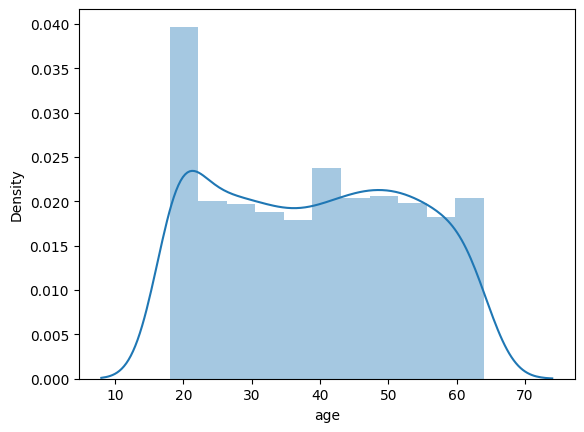

In [111]:
sns.distplot(df.age,kde=True)

/home/godslayer/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


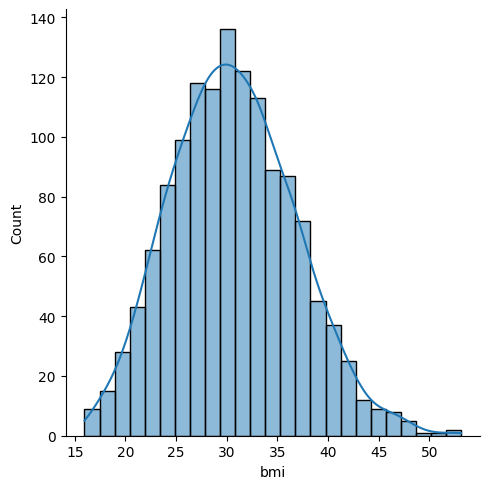

In [112]:
sns.displot(df.bmi,kde=True)

([<matplotlib.patches.Wedge at 0x7f78c2fa9290>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'NO'),
  Text(0.9601119635212645, -0.7198506911181947, 'YES')],
 [Text(-0.48005598176063224, 0.3599253455590972, '79.5%'),
  Text(0.5600653120540708, -0.41991290315228014, '20.5%')])

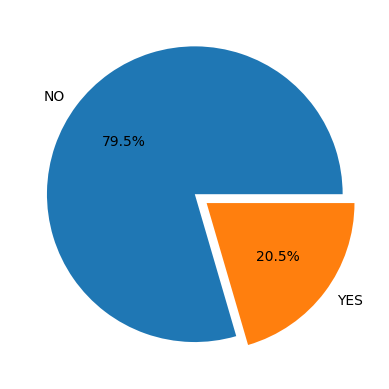

In [113]:
plt.pie(df.smoker.value_counts(),[0,0.1],labels=['NO','YES'],autopct='%1.1f%%')

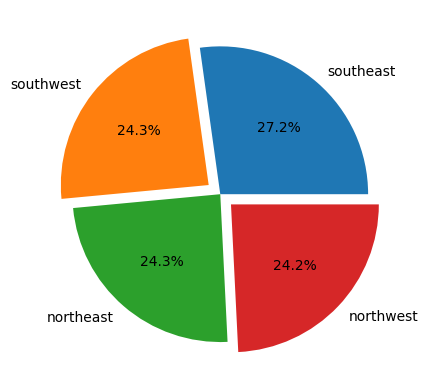

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

['southwest' 'southeast' 'northwest' 'northeast']


In [114]:
plt.pie(df.region.value_counts(),[0,0.1,0,0.1],labels=['southeast','southwest','northeast','northwest'],autopct='%1.1f%%')
plt.show()
display(df.region.value_counts())
print(df.region.unique())

<Axes: xlabel='region'>

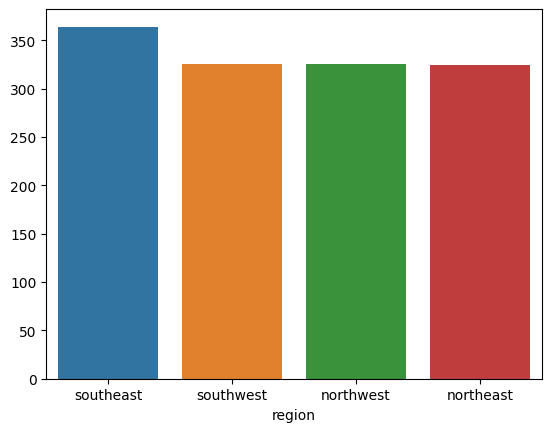

In [115]:
sns.barplot(x=df.region.value_counts().index,y=df.region.value_counts().values)

<Axes: xlabel='sex'>

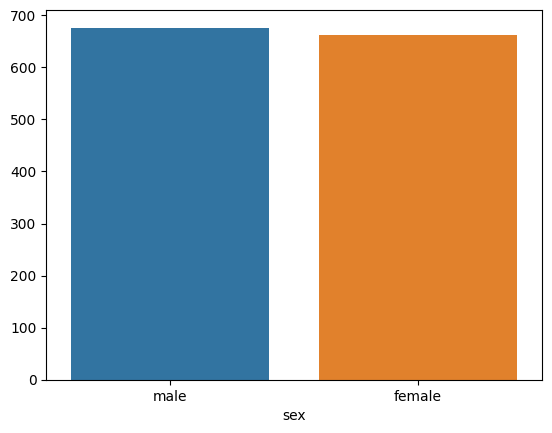

In [116]:
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts().values)

Multivaraite


<Axes: >

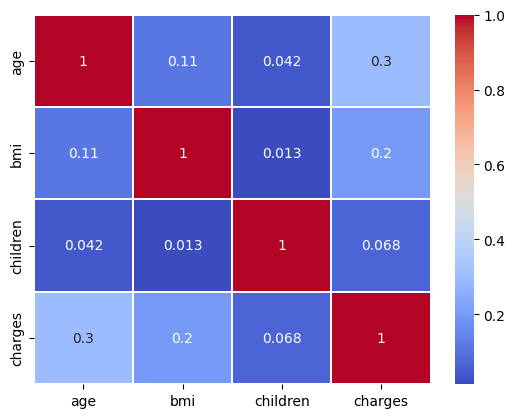

In [117]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2)

Outlier Detection

<Axes: >

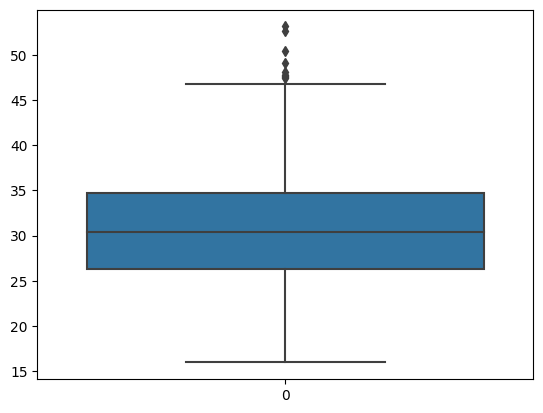

In [118]:
sns.boxplot(df.bmi)

In [119]:
#removal methods
# IQR,Z-score,Percentile Method

# Finding quartile
# Q1=25%
# Q2=50%
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
Iqr=q3-q1
print(Iqr)
upper_limit=q3+1.5*Iqr
display(upper_limit)
lower_limit=q1-1.5*Iqr
display(lower_limit)

8.3975


47.290000000000006

13.7

In [120]:
# df['bmi']=np.where(df['bmi']>upper_limit,30,df['bmi'])

<Axes: >

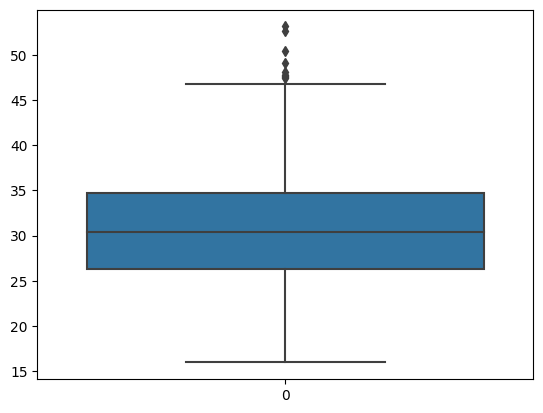

In [121]:
sns.boxplot(df.bmi,width=0.8)

In [122]:
# 5 point analysis
# min, max, median, Q1, Q3
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Visulization

In [123]:
# Sweetviz
# https://medium.com/analytics-vidhya/automated-eda-using-pandas-profiling-sweetviz-autoviz-4f15c4031a12

# Shortcut


<h1>Outlier detection<h1>

In [124]:
# using boxplot

In [125]:
# Removing outliers using IQR
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
Iqr=q3-q1
print(Iqr)
upper_limit=q3+1.5*Iqr
display(upper_limit)
lower_limit=q1-1.5*Iqr
display(lower_limit)


8.3975


47.290000000000006

13.7

(1338, 7)

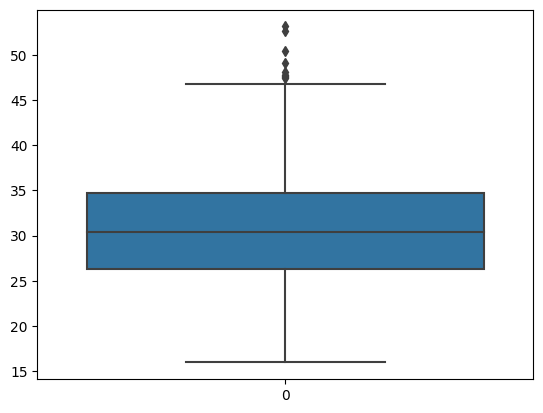

In [126]:
# df=df[df['bmi']<upper_limit]
sns.boxplot(df.bmi,width=0.8)
df.shape

In [127]:
# Replacement using Z-score
# Z-score=(x-mean)/std
# how much the data is spread out from the mean



In [128]:
from scipy import stats

In [129]:
bmi_z_score=stats.zscore(df.bmi)
print(bmi_z_score)

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64


<Axes: >

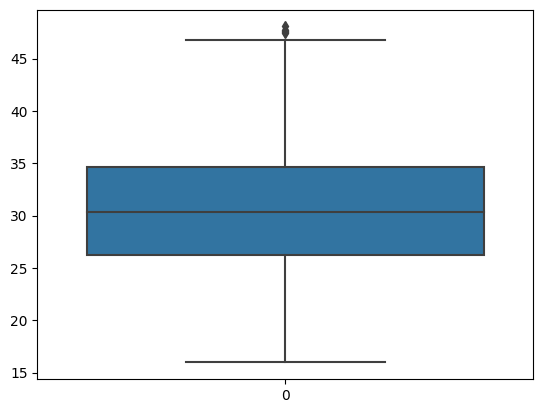

In [136]:
df_z=df[np.abs(bmi_z_score)<3]
sns.boxplot(df_z.bmi,width=0.8)

In [137]:
df_z.shape

(1334, 7)

Percentile

<Axes: >

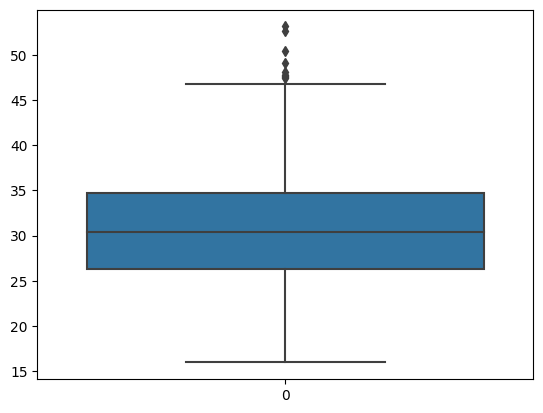

In [138]:
sns.boxplot(df.bmi,width=0.8)

<Axes: >

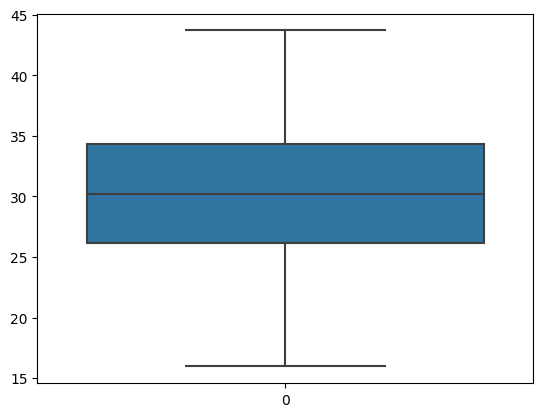

In [140]:
p99=df.bmi.quantile(0.99)
df=df[df['bmi']<p99]
sns.boxplot(df.bmi,width=0.8)

<h1>Encoding</h1>

<h3 style="color:skyblue">Label Encoding</h3>

In [141]:
from sklearn.preprocessing import LabelEncoder


In [146]:
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<h3 style="color:skyblue">One Hot Encoding</h3>

In [150]:
df_main=pd.get_dummies(df,columns=['region']).astype('int64')
df_main.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


<Axes: >

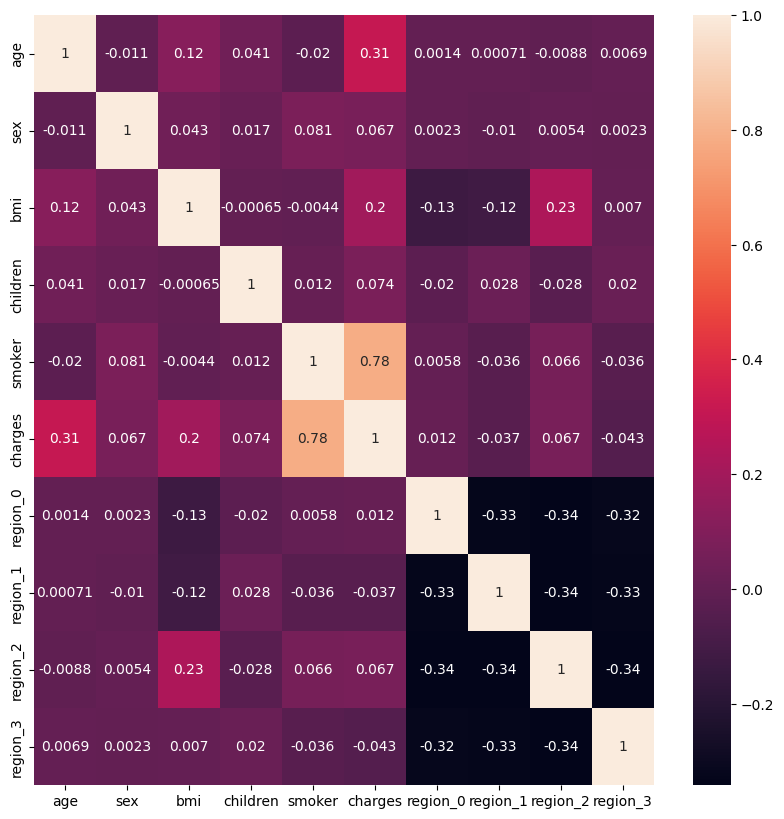

In [153]:
plt.figure(figsize=(10,10))

sns.heatmap(df_main.corr(),annot =True)

In [156]:
df_main.corr().charges.sort_values(ascending=False)

charges     1.000000
smoker      0.782853
age         0.309005
bmi         0.197616
children    0.073956
sex         0.067452
region_2    0.067271
region_0    0.011767
region_1   -0.036899
region_3   -0.043467
Name: charges, dtype: float64

In [157]:
df_main.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0


## x and y split, independent and dependent variable

In [158]:
y=df_main['charges']
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: charges, Length: 1309, dtype: int64

In [160]:
X=df_main.drop('charges',axis=1)
X

,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
0,19,0,27,0,1,0,0,0,1
1,18,1,33,1,0,0,0,1,0
2,28,1,33,3,0,0,0,1,0
3,33,1,22,0,0,0,1,0,0
4,32,1,28,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,0,1,0,0
1334,18,0,31,0,0,1,0,0,0
1335,18,0,36,0,0,0,0,1,0
1336,21,0,25,0,0,0,0,0,1


## Scaling of independent variable

In [162]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df_new=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
display(df_new)


,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
0,0.021739,0.0,0.428571,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.642857,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.642857,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.250000,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.464286,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,0.695652,1.0,0.535714,0.6,0.0,0.0,1.0,0.0,0.0
1305,0.000000,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.000000,0.0,0.750000,0.0,0.0,0.0,0.0,1.0,0.0
1307,0.065217,0.0,0.357143,0.0,0.0,0.0,0.0,0.0,1.0


## Train , test ,split

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_new,y,test_size=0.3,random_state=42)


In [186]:
display(X_train)

,age,sex,bmi,children,smoker,region_0,region_1,region_2,region_3
1214,1.000000,1.0,0.750000,0.4,1.0,0.0,0.0,1.0,0.0
677,0.043478,1.0,0.607143,0.2,0.0,0.0,1.0,0.0,0.0
534,0.978261,0.0,0.750000,0.0,0.0,0.0,0.0,1.0,0.0
1174,0.608696,1.0,0.892857,0.4,0.0,0.0,1.0,0.0,0.0
864,0.717391,0.0,0.785714,0.6,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.108696,0.0,0.571429,0.0,1.0,0.0,0.0,0.0,1.0
1130,0.108696,0.0,0.285714,0.4,0.0,0.0,1.0,0.0,0.0
1294,0.956522,1.0,0.821429,0.0,0.0,0.0,0.0,1.0,0.0
860,0.413043,0.0,0.500000,0.4,0.0,0.0,0.0,0.0,1.0
